## Lecture 06 : Data Visualization (Part 1)

This is the first of a two part lecture examining data visualization.  In this part, we focus on line, scatter, and bar plots. These can be very helpful when trying to understand your data and when communicating properties of your data. 

The standard imports we use for most lectures.

In [4]:
from datascience import *
import numpy as np

These are the new commands we use to setup the plotting tools.  You don't need to understand these but you need to run them at the beginning of your notebook:

In [5]:
# This command enables plots to appear directly in your notebook.
%matplotlib inline

# This includes the powerful matplotlib plotting library
import matplotlib.pyplot as plots

# This sets the style to mirror that of the popular fivethirtyeight blog ...
plots.style.use('fivethirtyeight')

---

# Preparing the Census Data

In this lecture we continue with the census data.  However, before we proceed we will do some initial cleanup.

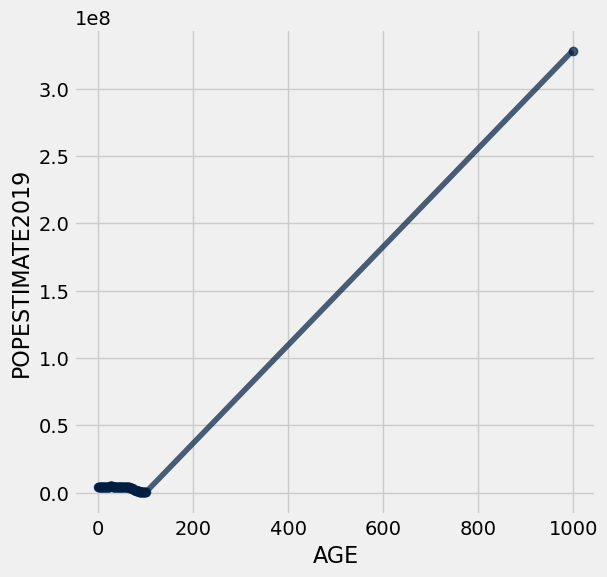

In [24]:
full = Table.read_table('data/nc-est2019-agesex-res.csv')
full.where('SEX',0).plot('AGE', 'POPESTIMATE2019',marker='o')

**Exercise:** Simplify the table to contain just the `"SEX"`, `"AGE"`, and the population estimates for `"2014"` and `"2019"`. Remove the aggregate data stored in `"AGE"=999"` (see previous lecture for details). Save the result in a table called `data`.

In [9]:
data = (
    full.relabeled('POPESTIMATE2014', '2014') # relabelled to 2014
    .relabeled('POPESTIMATE2019', '2019') # and 2019
    .select('SEX', 'AGE', '2014', '2019')) # selected columns we wanted
data.sort('AGE', descending = True)

SEX,AGE,2014,2019
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,98,59546,86150


In [11]:
data = data.where('AGE', are.not_equal_to(999))
# or you can do data = data.where('AGE',are.below(999))
data.sort('AGE', descending = True)

SEX,AGE,2014,2019
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,99,41277,57124
1,99,9032,14596
2,99,32245,42528
0,98,59546,86150
1,98,13659,23543
2,98,45887,62607
0,97,82948,116969


<details><summary>Click to Expand Solution</summary>
    

```python
data = (
    full
        .select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
        .relabeled('POPESTIMATE2014', '2014')
        .relabeled('POPESTIMATE2019', '2019')
        .where('AGE', are.not_equal_to(999)) # remove aggregates   
)
data
```
    
Notice in this solution we use an extra parenthesis:

```python
data = (
    # I put my code 
    # on multiple lines here
)
```
    
This allows me to break the expression over multiple lines.  

</details>

--- 

# Line Plots 

Line plots are used to visualize the relationship between two numerical variables where we believe one is a function of the other.  There is single x (horizontal axis) value and one or more y (vertical axis) values.  

**Exercise:** Plot the relationship between age and the *total population* at that age in 2019.

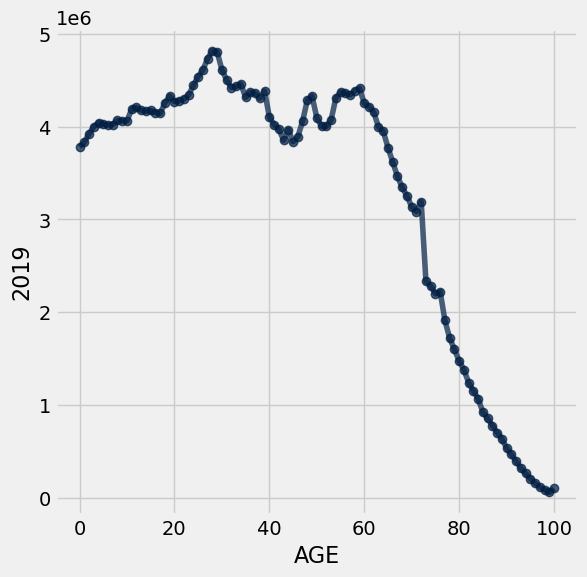

In [13]:
data.where('SEX',0).plot('AGE','2019', marker='o')

<details><summary>Click to Expand Solution</summary>
    

```python
data.where("SEX", 0).plot('AGE', '2019')
```

</details>

**Exercise:** What happens when I plot something like:

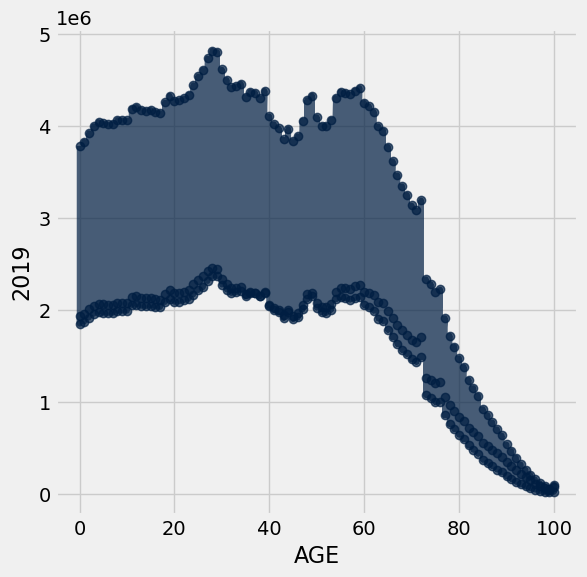

In [14]:
data.plot("AGE", "2019", marker="o")

What happened?

**Exercise:** How does the population change between `2014` and `2019`? Plot both years

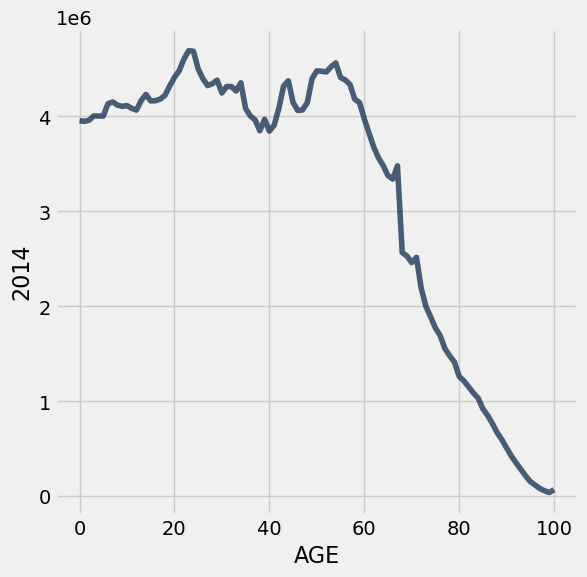

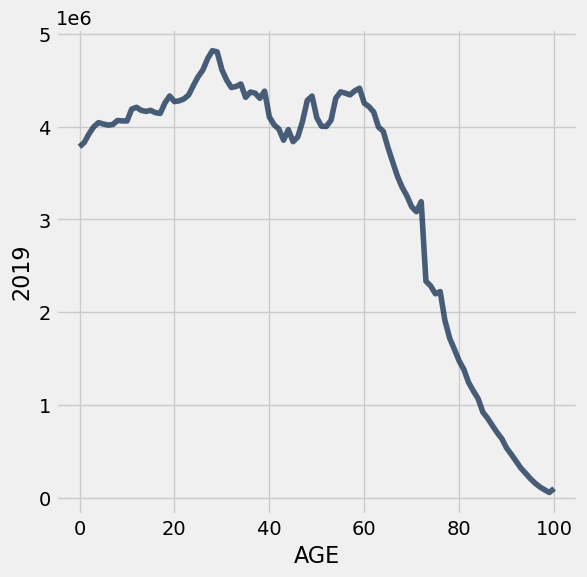

In [16]:
data.where('SEX',0).plot('AGE','2014')
data.where('SEX',0).plot('AGE','2019')

**Exercise:** It is very difficult to relate both years by looking at two separate plots.  Merge both plots into a single plot. (Try making it interactive by replacing `plot` with `iplot`)

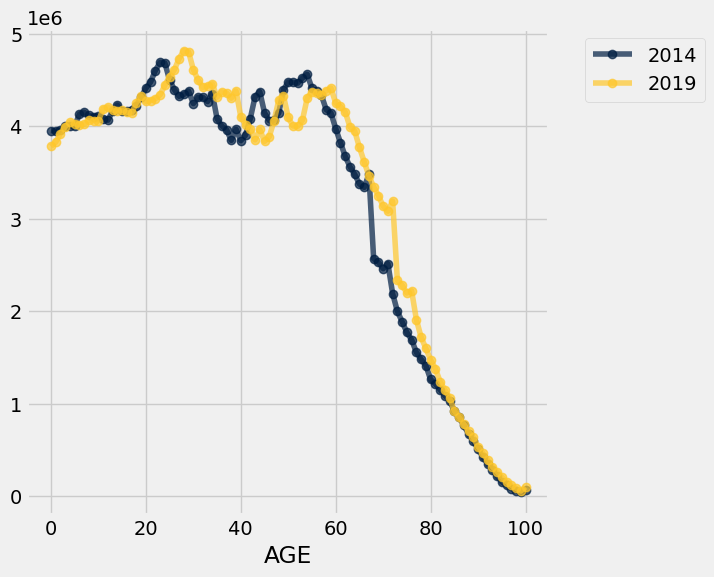

In [21]:

(data
 .where('SEX',0) # SEX = 0 Total= Male + Female, SEX =1 male, SEX = 2 female
 .plot('AGE', make_array('2014','2019'), marker='o')) # not marker = 0, but marker = o

In [22]:
Table.plot?

Signature:
Table.plot(
    self,
    column_for_xticks=None,
    select=None,
    overlay=True,
    width=None,
    height=None,
    **vargs,
)
Docstring:
Plot line charts for the table. Redirects to ``Table#iplot`` for plotly charts if interactive
plots are enabled with ``Table#interactive_plots``

Args:
    column_for_xticks (``str/array``): A column containing x-axis labels

Kwargs:
    overlay (bool): create a chart with one color per data column;
        if False, each plot will be displayed separately.

    show (bool): whether to show the figure if using interactive plots; if false, the figure 
        is returned instead

    vargs: Additional arguments that get passed into `plt.plot`.
        See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
        for additional arguments that can be passed into vargs.
Raises:
    ValueError -- Every selected column must be numerical.

Returns:
    Returns a line plot (connected scatter). Each plot is labeled using
    the

What do we observe?

---

## Males vs Females

How does the proportion of males and females change with age?

**Exercise:** Create a table containing three columns `"Age"`, `"Males"`, and `"Females"` with the corresponding population counts for 2019.

In [27]:
data.where('SEX',0).column('AGE') # array data type
# we extracted the AGE column from data, and we get an array data type

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [30]:
#Table.with_columns?
help(Table.with_columns)

Help on function with_columns in module datascience.tables:

with_columns(self, *labels_and_values, **formatter)
    Return a table with additional or replaced columns.
    
    
    Args:
        ``labels_and_values``: An alternating list of labels and values
            or a list of label-value pairs. If one of the labels is in
            existing table, then every value in the corresponding column is
            set to that value. If label has only a single value (``int``),
            every row of corresponding column takes on that value.
        ''formatter'' (single Formatter value): A single formatter value
            that will be applied to all columns being added using this
            function call.
    
    Raises:
        ``ValueError``: If
            - any label in ``labels_and_values`` is not a valid column
                name, i.e if label is not of type (str).
            - if any value in ``labels_and_values`` is a list/array and
                does not have the s

In [28]:
pop_2019 = Table().with_columns(
    'Age', data.where('SEX',0).column('AGE'), # populating our new column Age with an array we extracted from table called data
    'Males', data.where('SEX', 1).column('2019'),
    'Females', data.where('SEX',2).column('2019')
)
pop_2019

Age,Males,Females
0,1935117,1847935
1,1958585,1871014
2,2005544,1916500
3,2043010,1955655
4,2066951,1976372
5,2061200,1967081
6,2052956,1964271
7,2055735,1966584
8,2079723,1986471
9,2073148,1988726


**Exercise:** Plot the number of males and females against their age as two separate lines.

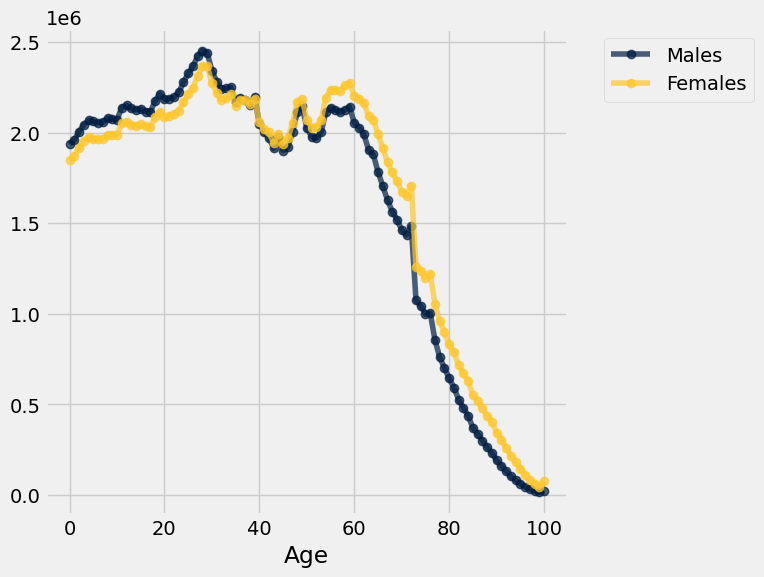

In [32]:
pop_2019.plot('Age',marker='o')

**Exercise:** Add a column containing the proportion of females and plot that against age.

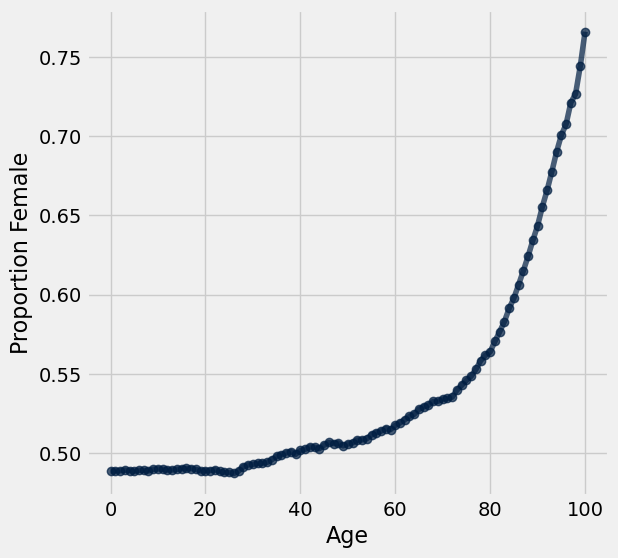

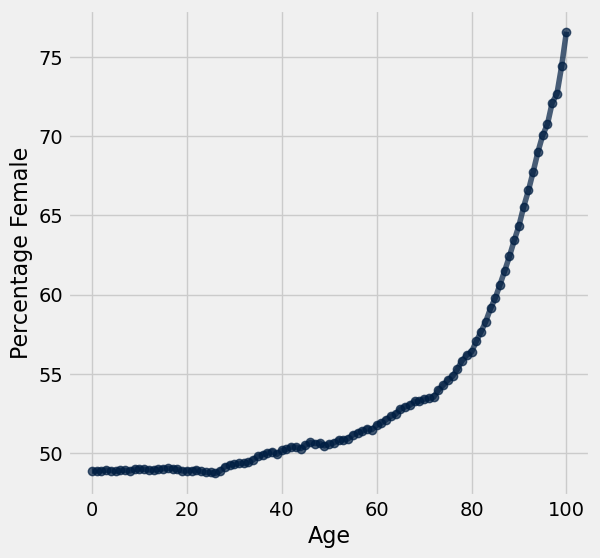

In [38]:
top_pop_2019 = pop_2019.column('Females') + pop_2019.column('Males') # notice here we extract columns
# as arrays to then do array operations, like adding, to find total population again
pop_2019 = pop_2019.with_column('Proportion Female', pop_2019.column('Females')/top_pop_2019)
pop_2019 = pop_2019.with_column('Percentage Female', (pop_2019.column('Females')/top_pop_2019)*100)

pop_2019.plot('Age', 'Proportion Female', marker="o")
pop_2019.plot('Age', 'Percentage Female', marker="o")


In [35]:
pop_2019.column('Females')/top_pop_2019

array([ 0.48847729,  0.48856656,  0.48864827,  0.48907698,  0.48879894,
        0.48831772,  0.48896191,  0.48891796,  0.48853326,  0.489608  ,
        0.48982797,  0.48963863,  0.48915844,  0.48913195,  0.48957596,
        0.4899435 ,  0.49013232,  0.49002022,  0.48955044,  0.48855439,
        0.48868827,  0.4887983 ,  0.48932021,  0.48826804,  0.48757706,
        0.48759126,  0.48692841,  0.48852197,  0.49120234,  0.49235707,
        0.4927026 ,  0.49329866,  0.49341095,  0.49395586,  0.49569833,
        0.49775503,  0.49882308,  0.499881  ,  0.50079641,  0.49902895,
        0.50145994,  0.50214539,  0.50372012,  0.50356275,  0.50265585,
        0.50481056,  0.50652753,  0.50586441,  0.50623783,  0.50442459,
        0.50559248,  0.50631527,  0.50806441,  0.5081351 ,  0.5089171 ,
        0.51136033,  0.51270002,  0.51367854,  0.51527988,  0.51466213,
        0.51731962,  0.51889247,  0.520955  ,  0.52307307,  0.52436327,
        0.5275183 ,  0.5290615 ,  0.53012192,  0.5324643 ,  0.53

Notice there is a large change in the proportion of females at older ages. You can't see this easily in the earlier visualization.  This is why we will often construct multiple visualizations with additional transformations to help reveal potentially interesting patterns in our data.

--- 

# Scatter Plots 

Scatter plots are also used to visualize the relationship between numerical data.  However, unlike line plots they can be more flexible and do not imply a functional relationship between data. 

Here we will examine the `"actors.csv"` table which contains 50 rows, corresponding to the 50 top grossing actors. The table is already sorted by `"Total Gross"`, so it is easy to see that *Harrison Ford* is the highest grossing actor.

In [ ]:
# Actors and their highest grossing movies
actors = Table.read_table('data/actors.csv')
actors

**Exercise:** Construct a scatter plot examining the relationship between `"Number of Movies"` and `"Average per Movie"`. (Try using `iscatter` instead.)

Why not use a line plot?

Who is the outlier in the top left?

---
<center> Return to Slides </center>

---


# Bar Charts 

Bar charts are used to visualize the relationship between numerical attributes and categorical attributes.

Here we examine the top 200 highest grossing movies of all time (as of 2017). 

In [ ]:
top_movies = Table.read_table('data/top_movies_2017.csv')
top_movies

**Exercise:** Based on this data, what is the relationship between the studios and their total revenue? Construct a bar plot showing the total `Gross (Adjusted)` income for each studio.

**Exercise:** Dig deeper into the top studio.  
1. Plot the top grossing movies.
2. Plot relationship between gross revenue and release year


## Bonus

You do not need to learn about plotly or any of the syntax I am about to use, *this is bonus material*.  However, I think the following plot will hopefully highlight how you can mix different kinds of data to make a visualization. 

Notice here we specify what variables to encode as `x`, `y`, and `color`. We have also included the movie title inside each marker so when you hover over with your mouse you can see which movie each dot corresponds to. How many "dimensions" is this plot?

<details> <summary>Solution</summary>

```python
import plotly.express as px # Import the powerful plotly viz tool
px.scatter(x = top_movies.column("Year"), 
           y = top_movies.column("Gross (Adjusted)"), 
           color = top_movies.column("Studio"),
           hover_name = top_movies.column("Title"))
```
    
</details>